In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold,train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the file
gt=pd.read_csv("/gas_turbines.csv")
gt.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
# describing file to check for null values,shapes and data type
gt.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [4]:
gt.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [5]:
#converting TEY into Categorical Variable by Calculating its Median
print("Median -",gt["TEY"].median())

Median - 133.78


In [6]:
#Creating a new Column for categorical sales value
gt["tey"]= "<=133.78" 
gt.loc[gt["TEY"]>=133.78,"tey"]=">=133.78"
gt.drop(["TEY"],axis=1,inplace = True)

# applying lable encoder to tey column and One Hot Encoding for other
label_encoder = preprocessing.LabelEncoder()
gt["tey"]= label_encoder.fit_transform(gt["tey"]) 

print(gt.shape)
gt.head()

(15039, 11)


,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,tey
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,0
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,0
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,0
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,0
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,0


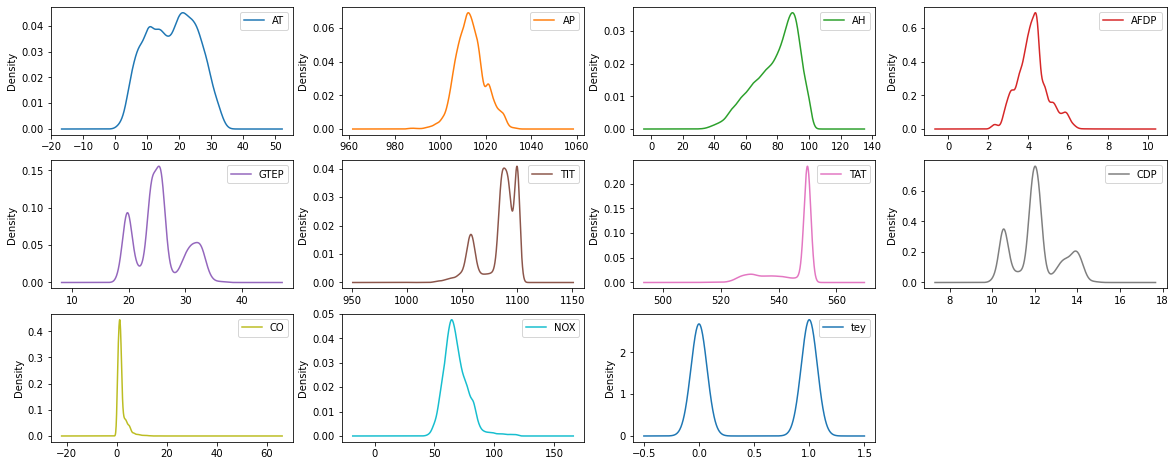

In [7]:
gt.plot(kind="kde",subplots=True,layout=(3,4),sharex=False,sharey=False,figsize=(20,8))
plt.show();

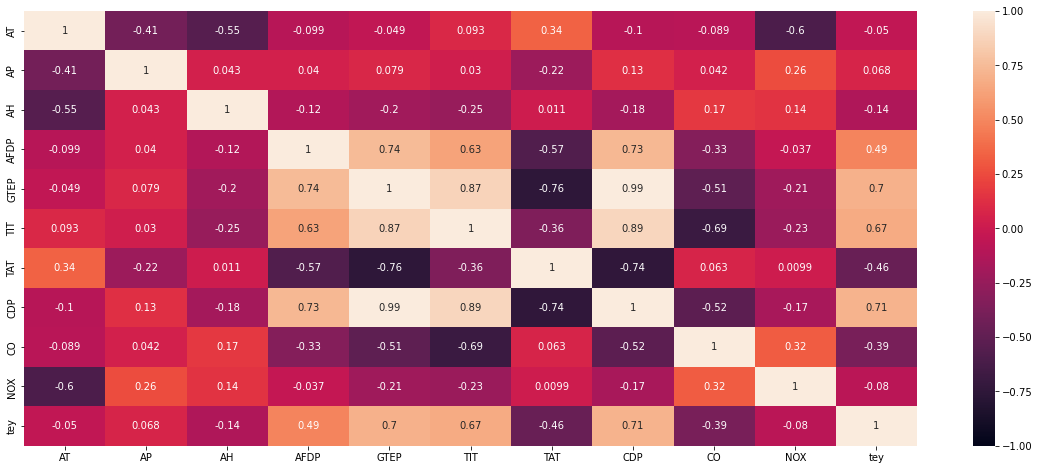

In [8]:
# correlation matrix
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(gt.corr(), vmin=-1, vmax=1, square=False, annot=True);

In [9]:
# split data into X and Y variables
X = gt.iloc[:,0:-1]
Y = gt.iloc[:,-1]

In [10]:
# Standardization,fit,transform and describe the dataset
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04
mean,-2.320107e-16,-1.925280e-14,1.844983e-16,3.810001e-16,1.107344e-16,-2.324212e-15,1.744899e-15,3.640356e-16,1.953355e-17,-6.862579e-17
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00,-2.779497e+00,-1.806771e+00,-5.021933e+00,-4.188141e+00,-1.992416e+00,-8.874862e-01,-3.861033e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01,-6.266930e-01,-5.091458e-01,-2.540512e-01,-4.101146e-01,-4.354335e-01,-5.015202e-01,-6.578107e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01,-1.854065e-02,-8.075681e-02,2.965544e-01,5.712570e-01,-7.011925e-02,-2.620452e-01,-1.518527e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01,4.612196e-01,4.228638e-01,7.382490e-01,5.928675e-01,4.311680e-01,8.455882e-02,5.486567e-01
max,2.266234e+00,3.275970e+00,1.528011e+00,4.486233e+00,2.871006e+00,1.028678e+00,6.627839e-01,2.700105e+00,1.895949e+01,4.937717e+00


**Hyper Tuning of Parameters using Grid Search CV                                                                  
Baseline Model                                                                     
Number of Neurons in activation layer**

In [29]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = "uniform",activation = "relu"))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = "uniform",activation = "relu"))
    model.add(Dense(1,activation = "sigmoid"))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = "binary_crossentropy",optimizer = adam,metrics = ["accuracy"])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters
neuron1 = [4,6,8]
neuron2 = [2,4,6]

#Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

# Summarize the results
print("Best : {}, using {}".format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
  print("{},{} with: {}".format(mean, stdev, param))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .......neuron1=4, neuron2=2;, score=506.868 total time=   2.5s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END ....neuron1=4, neuron2=2;, score=235876.359 total time=   2.4s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END ....neuron1=4, neuron2=2;, score=766225.438 total time=   2.3s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .......neuron1=4, neuron2=2;, score=504.054 total time=   2.3s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .......neuron1=4, neuron2=2;, score=489.855 total time=   2.1s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END ...neuron1=4, neuron2=4;, score

**Batch Size and Epochs**

In [32]:
def create_model():
    model = Sequential()
    model.add(Dense(8,input_dim = 10,kernel_initializer = "uniform",activation = "relu"))
    model.add(Dense(4,input_dim = 8,kernel_initializer = "uniform",activation = "relu"))
    model.add(Dense(1,activation = "sigmoid"))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = "binary_crossentropy",optimizer = adam,metrics = ["accuracy"])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters
nbatch_size = [10,20,40]
epochs = [10,50,100]

#Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

# Summarize the results
print("Best : {}, using {}".format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
  print("{},{} with: {}".format(mean, stdev, param))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END batch_size=10, epochs=10;, score=31588106240.000 total time=  28.2s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END batch_size=10, epochs=10;, score=11859368960.000 total time=  30.3s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END batch_size=10, epochs=10;, score=13794252800.000 total time=  28.3s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END batch_size=10, epochs=10;, score=8980419584.000 total time=  27.4s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END batch_size=10, epochs=10;, score=20149254144.000 total time=  29.0s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END batch_s

**Learning rate and Drop out rate**

In [35]:
def create_model(learning_rate,dropout_rate):
    model = Sequential() 
    model.add(Dense(8,input_dim = 10,kernel_initializer = "uniform",activation = "relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 8,kernel_initializer = "uniform",activation = "relu"))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = "sigmoid"))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = "binary_crossentropy",optimizer = adam,metrics = ["accuracy"])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters

learning_rate = [0.001,0.01]
dropout_rate = [0.0,0.1]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

# Summarize the results
print("Best : {}, using {}".format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
  print("{},{} with: {}".format(mean, stdev, param))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/4] END dropout_rate=0.0, learning_rate=0.001;, score=8205317632.000 total time= 1.9min
[CV 2/5; 1/4] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/4] END dropout_rate=0.0, learning_rate=0.001;, score=5157908480.000 total time= 1.9min
[CV 3/5; 1/4] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/4] END dropout_rate=0.0, learning_rate=0.001;, score=11686819840.000 total time= 2.0min
[CV 4/5; 1/4] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/4] END dropout_rate=0.0, learning_rate=0.001;, score=12703760384.000 total time= 1.9min
[CV 5/5; 1/4] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/4] END dropout_rate=0.0, learning_rate=0.001;, score=19147792384.000 total time= 2.0min
[CV 1/5; 2/4] START dropout_rate=0.0, lear

**Activation Function and Kernel Initializer**

In [41]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 8,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = "sigmoid"))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = "binary_crossentropy",optimizer = adam,metrics = ["accuracy"])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 100)

# Define the grid search parameters
activation_function = ["softmax","relu"]
init = ["uniform","normal"]

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

# Summarize the results
print("Best : {}, using {}".format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
  print("{},{} with: {}".format(mean, stdev, param))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START activation_function=softmax, init=uniform...................
[CV 1/5; 1/4] END activation_function=softmax, init=uniform;, score=324007.656 total time= 2.1min
[CV 2/5; 1/4] START activation_function=softmax, init=uniform...................
[CV 2/5; 1/4] END activation_function=softmax, init=uniform;, score=309497.156 total time= 2.0min
[CV 3/5; 1/4] START activation_function=softmax, init=uniform...................
[CV 3/5; 1/4] END activation_function=softmax, init=uniform;, score=330328.562 total time= 2.1min
[CV 4/5; 1/4] START activation_function=softmax, init=uniform...................
[CV 4/5; 1/4] END activation_function=softmax, init=uniform;, score=322245.188 total time= 2.0min
[CV 5/5; 1/4] START activation_function=softmax, init=uniform...................
[CV 5/5; 1/4] END activation_function=softmax, init=uniform;, score=313296.531 total time= 2.0min
[CV 1/5; 2/4] START activation_function=softm

Best : 2408894.575, using {'neuron1': 8, 'neuron2': 4}                         
Best : 8115084591104.0, using {'batch_size': 10, 'epochs': 100}                      
Best : 8550908952576.0, using {'dropout_rate': 0.1, 'learning_rate': 0.01}                      
Best : 6859988480819.2, using {'activation_function': 'relu', 'init': 'normal'}

In [ ]:
# #creating model by hypertuning its parameter using grid search CV
# def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
#     model = Sequential()
#     model.add(Dense(neuron1,input_dim = 10,kernel_initializer = init,activation = activation_function))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1,activation = "sigmoid"))
    
#     adam = Adam(lr = learning_rate)
#     model.compile(loss = "binary_crossentropy",optimizer = adam,metrics = ["accuracy"])
#     return model

# # Create the model

# model = KerasClassifier(build_fn = create_model,verbose = 0)

# # Define the grid search parameters

# nbatch_size = [10,20,40]
# epochs = [10,50,100]
# learning_rate = [0.001,0.01]
# dropout_rate = [0.0,0.1]
# activation_function = ["softmax","relu","tanh"]
# init = ["uniform","normal"]
# neuron1 = [4,6,8]
# neuron2 = [2,4,6]

# # Make a dictionary of the grid search parameters

# param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
#                    activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# # Build and fit the GridSearchCV

# grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
# grid_result = grid.fit(X_standardized,Y)

# # Summarize the results
# print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#   print('{},{} with: {}'.format(mean, stdev, param))

Fitting 2 folds for each of 576 candidates, totalling 1152 fits
[CV 1/2; 1/576] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/2; 1/576] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=2188.081 total time=  12.5s
[CV 2/2; 1/576] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/2; 1/576] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2;, score=2218.444 total time=  11.3s
[CV 1/2; 2/576] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/2; 2/576] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learni

[CV 1/2; 13/576] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=2;, score=19989.125 total time=  12.4s
[CV 2/2; 13/576] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=2
[CV 2/2; 13/576] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=2;, score=20339.799 total time=  12.5s
[CV 1/2; 14/576] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4
[CV 1/2; 14/576] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=19966.305 total time=  12.1s
[CV 2/2; 14/576] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=5,

[CV 2/2; 25/576] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=7, neuron2=2;, score=2023.089 total time=  13.4s
[CV 1/2; 26/576] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=7, neuron2=4
[CV 1/2; 26/576] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=7, neuron2=4;, score=2163.525 total time=  14.4s
[CV 2/2; 26/576] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=7, neuron2=4
[CV 2/2; 26/576] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=7, neuron2=4;, score=2188.391 total time=  14.6s
[CV 1/2; 27/576] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=7, ne

[CV 1/2; 38/576] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=10040.682 total time=  51.9s
[CV 2/2; 38/576] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/2; 38/576] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4;, score=10293.564 total time= 1.1min
[CV 1/2; 39/576] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=6
[CV 1/2; 39/576] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=6;, score=10077.989 total time=  57.4s
[CV 2/2; 39/576] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neur

[CV 2/2; 50/576] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=5, neuron2=4;, score=101577.148 total time= 1.4min
[CV 1/2; 51/576] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
[CV 1/2; 51/576] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=99320.398 total time= 1.7min
[CV 2/2; 51/576] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6
[CV 2/2; 51/576] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=5, neuron2=6;, score=101655.023 total time= 1.5min
[CV 1/2; 52/576] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=

[CV 1/2; 63/576] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=7, neuron2=6;, score=10084.149 total time= 1.6min
[CV 2/2; 63/576] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=7, neuron2=6
[CV 2/2; 63/576] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=7, neuron2=6;, score=10220.977 total time= 1.6min
[CV 1/2; 64/576] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/2; 64/576] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=99063.211 total time= 1.6min
[CV 2/2; 64/576] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, ne

[CV 2/2; 75/576] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=6;, score=2242.597 total time=  16.8s
[CV 1/2; 76/576] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=2
[CV 1/2; 76/576] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=2;, score=2185.511 total time=  19.4s
[CV 2/2; 76/576] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=2
[CV 2/2; 76/576] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=5, neuron2=2;, score=2139.059 total time=  16.6s
[CV 1/2; 77/576] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1

[CV 1/2; 88/576] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=7, neuron2=2;, score=19850.555 total time=  18.8s
[CV 2/2; 88/576] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=7, neuron2=2
[CV 2/2; 88/576] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=7, neuron2=2;, score=20357.809 total time=  16.8s
[CV 1/2; 89/576] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=7, neuron2=4
[CV 1/2; 89/576] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=7, neuron2=4;, score=19991.498 total time=  19.2s
[CV 2/2; 89/576] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=7,

[CV 2/2; 100/576] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=20413.121 total time=  17.8s
[CV 1/2; 101/576] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/2; 101/576] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=20100.164 total time=  18.6s
[CV 2/2; 101/576] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/2; 101/576] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=20344.242 total time=  16.9s
[CV 1/2; 102/576] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4,

[CV 1/2; 113/576] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=9992.024 total time= 1.4min
[CV 2/2; 113/576] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4
[CV 2/2; 113/576] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=5, neuron2=4;, score=10307.316 total time= 1.2min
[CV 1/2; 114/576] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6
[CV 1/2; 114/576] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=5, neuron2=6;, score=10001.829 total time= 1.4min
[CV 2/2; 114/576] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001,

**Note:since the output took long to execute so taking parameters from above GridSearchCV**

In [11]:
#Training model with optimum values of Hyperparameters
# Defining the model as per grid search output
def create_model():
    model = Sequential()
    model.add(Dense(8,input_dim = 10,kernel_initializer = "normal",activation = "relu"))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer = "normal",activation = "relu"))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = "sigmoid"))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = "binary_crossentropy",optimizer = adam,metrics = ["accuracy"])
    return model

# Create the model
model = KerasClassifier(build_fn = create_model,batch_size = 10,epochs = 100)

# Fitting the model
model.fit(X_standardized,Y)

# Predicting using trained model
Y_predict = model.predict(X_standardized)

#Printing its metrics
print(round(accuracy_score(Y,Y_predict)*100,2),"%")


Epoch 1/100
1504/1504 [==============================] - 6s 3ms/step - loss: 0.3392 - accuracy: 0.8285
Epoch 2/100
1504/1504 [==============================] - 4s 3ms/step - loss: 0.2463 - accuracy: 0.8816
Epoch 3/100
1504/1504 [==============================] - 4s 3ms/step - loss: 0.2343 - accuracy: 0.8886
Epoch 4/100
1504/1504 [==============================] - 4s 3ms/step - loss: 0.2285 - accuracy: 0.8931
Epoch 5/100
1504/1504 [==============================] - 4s 3ms/step - loss: 0.2244 - accuracy: 0.8963
Epoch 6/100
1504/1504 [==============================] - 4s 3ms/step - loss: 0.2238 - accuracy: 0.8950
Epoch 7/100
1504/1504 [==============================] - 4s 3ms/step - loss: 0.2213 - accuracy: 0.8956
Epoch 8/100
1504/1504 [==============================] - 4s 3ms/step - loss: 0.2200 - accuracy: 0.8978
Epoch 9/100
1504/1504 [==============================] - 4s 3ms/step - loss: 0.2196 - accuracy: 0.9001
Epoch 10/100
1504/1504 [==============================] - 4s 3ms/step - l

In [12]:
#Building Model based on Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, Y, test_size = 0.33, random_state = 5)

def final_model():
    model = Sequential()
    model.add(Dense(8,input_dim = 10,kernel_initializer = "normal",activation = "relu"))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer = "normal",activation = "relu"))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = "sigmoid"))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = "binary_crossentropy",optimizer = adam,metrics = ["accuracy"])
    return model

# Create the model
model = KerasClassifier(build_fn = final_model,batch_size = 10,epochs = 100)

# Fitting the model
model.fit(X_train,Y_train)

# Predicting using trained model
Y_predict = model.predict(X_test)

# Printing the metrics
print(round(accuracy_score(Y_test,Y_predict)*100,2),"%")

Epoch 1/100
1008/1008 [==============================] - 5s 3ms/step - loss: 0.4816 - accuracy: 0.8245
Epoch 2/100
1008/1008 [==============================] - 3s 3ms/step - loss: 0.3476 - accuracy: 0.8768
Epoch 3/100
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2948 - accuracy: 0.8879
Epoch 4/100
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2729 - accuracy: 0.8886
Epoch 5/100
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2615 - accuracy: 0.8891
Epoch 6/100
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2505 - accuracy: 0.8893
Epoch 7/100
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2446 - accuracy: 0.8912
Epoch 8/100
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2387 - accuracy: 0.8956
Epoch 9/100
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2390 - accuracy: 0.8892
Epoch 10/100
1008/1008 [==============================] - 3s 3ms/step - l

In [13]:
story=model.fit(X_standardized,Y,validation_split=0.33,epochs=100,batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 4s 3ms/step - loss: 0.3789 - accuracy: 0.8168 - val_loss: 0.2306 - val_accuracy: 0.8924
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2605 - accuracy: 0.8726 - val_loss: 0.2135 - val_accuracy: 0.8964
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2442 - accuracy: 0.8827 - val_loss: 0.2104 - val_accuracy: 0.9023
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2352 - accuracy: 0.8898 - val_loss: 0.2168 - val_accuracy: 0.8964
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2293 - accuracy: 0.8919 - val_loss: 0.2097 - val_accuracy: 0.9007
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2253 - accuracy: 0.8911 - val_loss: 0.2127 - val_accuracy: 0.9007
Epoch 7/100
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2257 - accuracy: 0.8937 - val_loss: 0.2091 - val_ac

In [14]:
# list all data in history from story as dictionary in key format from keras 
story.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

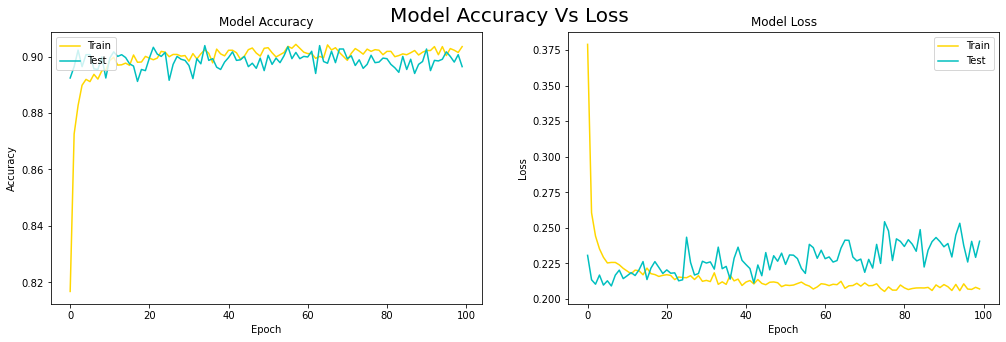

Accuracy of model : 89.85 %
Loss of model     : 22.77 %


In [15]:
# visualize history for accuracy & loss
fig = plt.figure(figsize=(17,5))
plt.suptitle("Model Accuracy Vs Loss", size=20, y=.95) 
plt.subplot(1,2,1)
plt.plot(story.history["accuracy"],color="gold")
plt.plot(story.history["val_accuracy"],color="c")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")

plt.subplot(1,2,2)
plt.plot(story.history["loss"],color="gold")
plt.plot(story.history["val_loss"],color="c")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper right")
plt.show()
print("Accuracy of model :",round(np.mean(story.history["val_accuracy"])*100,2),"%")
print("Loss of model     :",round(np.mean(story.history["val_loss"])*100,2),"%")

**Accuracy is increasing and loss is decreasing which shows a sign of good model.Therefore,this model can be used for predictions.**